Uma rede de lojas de modas e acessórios possui lojas físicas espalhadas por diversas locações. Com o grande aumento do uso da internet no ramo do e-commerce, o número de clientes frequentando lojas físicas decresceu de forma considerável. Com isso, a empresa precisa entender os fatores de localidade que influenciam na receita geral a fim de tomar decisões com relação à abertura de futuras lojas físicas e o rumo das já existentes.

O dataset que iremos trabalhar contém atributos importantes acerca de uma loja física e sua área ao redor. São eles:

**revenue:** Receita de uma determinada loja em certa localidade.

**location_age:** Número de anos passados desde que a loja abriu.

**num_competitors:** Número de concorrentes num raio de 32 km.

**median_income:** Renda média dos residentes da área.

**num_loyalty_members:** Membros inscritos no programa de fidelidade da loja.

**population_density:** Densidade populacional da área.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('drive/MyDrive/Colab Datasets/location_rev.csv')
df.head()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
0,42247.80,3.0,30527.57,1407.0,3302.0,12.0
1,38628.37,3.0,30185.49,1025.0,4422.0,11.0
2,39715.16,1.0,32182.24,1498.0,3260.0,12.0
3,35593.30,5.0,29728.65,2340.0,4325.0,10.0
4,35128.18,4.0,30691.17,847.0,3774.0,11.0


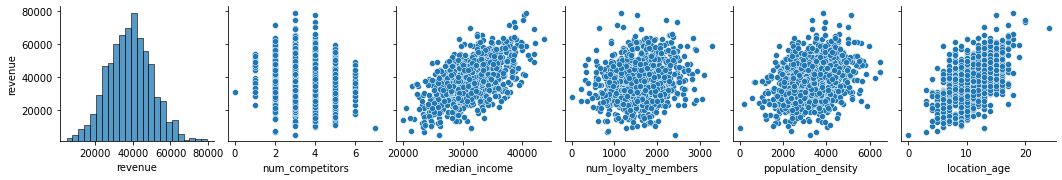

In [3]:
sns.pairplot(df, x_vars=df.columns, y_vars="revenue")
plt.show()

A partir dos gráficos anteriores, vemos parece que existe uma correlação decente entre a receita(revenue), a renda média dos residentes(median_income) e a idade da loja(location_age). Vamos confirmar isso em valores numéricos:

In [4]:
df.corr()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
revenue,1.000000,-0.156685,0.601888,0.173432,0.311653,0.552773
num_competitors,-0.156685,1.000000,-0.018398,-0.027283,0.035768,0.053796
median_income,0.601888,-0.018398,1.000000,0.011891,-0.041697,0.045621
num_loyalty_members,0.173432,-0.027283,0.011891,1.000000,-0.028611,0.036016
population_density,0.311653,0.035768,-0.041697,-0.028611,1.000000,-0.009977
location_age,0.552773,0.053796,0.045621,0.036016,-0.009977,1.000000


Como podemos ratificar através dos coeficientes de correlação, existe uma alta associação entre a receita, a renda média dos residentes do local e a idade da loja, o que faz sentido para uma visão de negócio. Isto é, quanto maior o poder aquisitivo da população local, mais ela poderá comprar e, portanto, contribuir para o alargamento da receita da empresa. Além disso, temos o indicativo de que quanto maior o tempo que uma loja está aberta, mais clientes ela atrai. Por fim, a densidade de população da área também possui certa influência na receita da loja, bem como a quantidade de concorrentes que contribui de forma negativa para o negócio.  

Entendido os atributos de locação que maximizam o ganho de receita de uma loja, agora vamos construir um modelo preditivo usando **regressão linear** para prever a receita de uma loja quando são fornecidos certos valores para os atributos da base de dados.

In [5]:
# X: preditores y: variável alvo
X = df[['num_competitors','median_income', 'num_loyalty_members', 'population_density', 'location_age']]
y = df['revenue']

In [6]:
# divisão dos dados  em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
model.coef_

array([-2.14765128e+03,  1.71903196e+00,  3.50665069e+00,  4.31777912e+00,
        2.06703103e+03])

Agora vamos criar um dataframe com os atributos de locação da base de dados para realizar uma previsão da receita

In [9]:
single_location = pd.DataFrame({'num_competitors': [7],\
                                'median_income': [50000],\
                                'num_loyalty_members': [1200],\
                                'population_density': [3000],\
                                'location_age': [15]})
model.predict(single_location)

array([68016.18611755])

Plotando as predições do modelo versus os valores reais

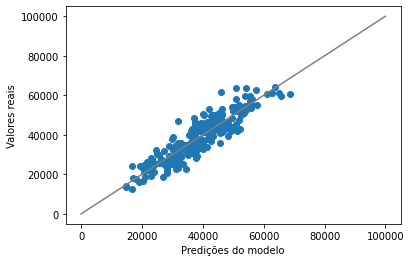

In [10]:
plt.scatter(model.predict(X_test), y_test)
plt.xlabel('Predições do modelo')
plt.ylabel('Valores reais')
plt.plot([0, 100000], [0, 100000], 'k-', color = 'gray')
plt.show()

Observando o gráfico anterior, vemos que há uma forte associação entre os valores previstos pelo modelo e os valores reais, o que nos informa que o modelo está performando bem no que se refere a prever os valores de receita para as lojas. 

Vamos confirmar isso através do coeficiente de correlação entre as previsões e os valores reais:


In [11]:
np.corrcoef(model.predict(X_test), y_test)

array([[1.        , 0.90615978],
       [0.90615978, 1.        ]])

O coeficiente aponta para uma correlação positiva forte, o que significa que o modelo performará bem para dados novos.

Fazendo uso desse modelo, a empresa poderá prever a receita para qualquer loja em qualquer localidade, além de ter o entedimento de onde posicionar melhor suas lojas a fim de maximizar o ganho total final das mesmas.